- **Data Analysis Process**
    - **Asking Questions (Objectives)**
    - **Data Wrangling**
      - Gather Data
      - Assessing Data (Quality, Issues)
      - Cleaning Data (Fix Issues)
    - **Perform EDA (Exploratory Data Analysis)**
      - Statistics and Visuals
      - Discover Data Patterns
      - Understand Data Distribution
    - **Draw Conclusion (Summarize Findings)**
    - **Communicate Result (Share)**

🧾 1. DimEmployee (Employees Data)

Contains general information about each employee.
Columns:

EmployeeID: Employee number.

FullName: Full name.

Gender: Gender (Male / Female).

Age: Employee’s age.

HireDate: Hiring date.

DepartmentID: The department where the employee works.

JobTitleID: The job title code.

ManagerID: The employee’s manager ID.

CityID: The city where the employee works.

Status: Employment status (Active, Resigned, etc.).

🏢 2. DimDepartment (Departments)

Contains the list of company departments.
Columns:

DepartmentID: Department number.

DepartmentName: Department name.

💼 3. DimJobTitle (Job Titles)

Contains job titles and their related salary ranges.
Columns:

JobTitleID: Job title number.

JobTitle: Name of the job.

SalaryRange: Salary range (e.g., from X to Y).

🌆 4. DimCity (Cities)

Contains city names and their countries.
Columns:

CityID: City number.

CityName: City name.

Country: Country name.

📊 5. FactEmployeePerformance (Employee Performance)

Contains monthly performance data for each employee.
Columns:

RecordID: Record number.

EmployeeID: Employee number.

Month: Month of the record.

AttendanceRate: Attendance percentage.

PerformanceScore: Performance score or rating.

Bonus: Bonus amount.

Salary: Actual salary.

OvertimeHours: Overtime hours worked.

Deduction: Deductions or penalties.

Suggested Analytical Questions:
1.	What is the average performance score and average salary in each department?
2.    Which city has the highest average salary and bonus ratio?
3.    Do male and female employees show any difference in performance or bonus?
4.    How does years of service affect employee performance?
5.    Which job title has the highest bonus ratio or the best overall performance?
6.    How does job level relate to salary and performance score?
7.    Which age group tends to perform better on average?
8.    Are employees with longer tenure more likely to have higher bonuses or performance?
9.    How do deductions, attendance, and overtime relate to performance?
10.   What are the employee status trends across departments?

Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel(r"D:\Mostafa\Excel\Files\HR_Dataset_Unclean.xlsx",sheet_name=None)
pd.options.display.max_columns = None

In [3]:
sheets.keys()

dict_keys(['DimEmployee', 'DimDepartment', 'DimJobTitle', 'DimCity', 'FactEmployeePerformance'])

In [4]:
df_DimEmployee = sheets['DimEmployee']
df_DimEmployee

,EmployeeID,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status
0,1,Madison Johnson,Male,NaN,2017-01-28,1,5,8,6,Active
1,2,Craig Copeland,Female,33.0,2020-10-16,4,3,25,4,On Leave
2,3,Stephanie Mitchell,Female,46.0,2024-05-16,7,5,10,7,On Leave
3,4,Leroy Reyes,Female,54.0,2024-11-27,3,5,27,7,Active
4,5,Troy Williams,Female,55.0,2022-05-13,2,4,15,5,On Leave
...,...,...,...,...,...,...,...,...,...,...
600,520,Daniel Wiggins,Male,29.0,2016-12-25,3,6,28,8,On Leave
601,219,Andrew Waller,Female,59.0,2016-10-11,5,5,15,2,Resigned
602,155,Travis Morgan,Female,46.0,2016-06-03,5,8,4,7,Active
603,255,Tyler Hill,Male,48.0,2020-02-24,3,1,13,2,Resigned


In [5]:
df_DimDepartment = sheets['DimDepartment']
df_DimDepartment

,DepartmentID,DepartmentName
0,1,HR
1,2,Finance
2,3,IT
3,4,Sales
4,5,Marketing
5,6,Customer Service
6,7,Operations


In [6]:
df_DimJobTitle = sheets['DimJobTitle']
df_DimJobTitle

,JobTitleID,JobTitle,SalaryRange
0,1,HR Specialist,5000-7000
1,2,Accountant,6000-9000
2,3,Software Developer,8000-15000
3,4,Sales Executive,4000-9000
4,5,Marketing Coordinator,5000-10000
5,6,Customer Support,3500-7000
6,7,Operations Officer,4500-8000
7,8,Data Analyst,7000-12000


In [7]:
df_DimCity = sheets['DimCity']
df_DimCity

,CityID,CityName,Country
0,1,Cairo,Egypt
1,2,Giza,Egypt
2,3,Alexandria,Egypt
3,4,Mansoura,Egypt
4,5,Tanta,Egypt
5,6,Asyut,Egypt
6,7,Sohag,Egypt
7,8,Zagazig,Egypt


In [8]:
df_FactEmployeePerformance = sheets['FactEmployeePerformance']
df_FactEmployeePerformance

,RecordID,EmployeeID,Month,AttendanceRate,PerformanceScore,Bonus,Salary,OvertimeHours,Deduction
0,R11,1,2024-01,99.01,5,1069,12043,26,961
1,R12,1,2024-02,88.27,3,1773,9902,5,637
2,R13,1,2024-03,80.06,2,1857,9565,21,1384
3,R14,1,2024-04,98.53,3,455,4383,12,502
4,R15,1,2024-05,86.48,4,824,13012,16,672
...,...,...,...,...,...,...,...,...,...
7195,R6008,600,2024-08,85.34,1,1416,12998,16,1008
7196,R6009,600,2024-09,92.04,4,905,4402,12,1407
7197,R60010,600,2024-10,85.83,4,930,11229,24,1137
7198,R60011,600,2024-11,90.25,1,502,10968,29,170


Cleaning

DimEmployee

In [9]:
df_DimEmployee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   EmployeeID    605 non-null    int64         
 1   FullName      590 non-null    object        
 2   Gender        605 non-null    object        
 3   Age           576 non-null    float64       
 4   HireDate      605 non-null    datetime64[ns]
 5   DepartmentID  605 non-null    int64         
 6   JobTitleID    605 non-null    int64         
 7   ManagerID     605 non-null    int64         
 8   CityID        605 non-null    int64         
 9   Status        605 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 47.4+ KB


In [10]:
df_DimEmployee.isnull().sum()

EmployeeID       0
FullName        15
Gender           0
Age             29
HireDate         0
DepartmentID     0
JobTitleID       0
ManagerID        0
CityID           0
Status           0
dtype: int64

In [11]:
df_DimEmployee.duplicated().sum()

np.int64(5)

In [12]:
df_DimEmployee.drop_duplicates(inplace=True)

In [13]:
df_DimEmployee['Age'] = df_DimEmployee.groupby('Gender')['Age'].transform(lambda x: x.fillna(x.mean()))
df_DimEmployee['FullName'] = df_DimEmployee['FullName'].fillna('Unknown')
df_DimEmployee.head(50)

,EmployeeID,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status
0,1,Madison Johnson,Male,39.840278,2017-01-28,1,5,8,6,Active
1,2,Craig Copeland,Female,33.000000,2020-10-16,4,3,25,4,On Leave
2,3,Stephanie Mitchell,Female,46.000000,2024-05-16,7,5,10,7,On Leave
3,4,Leroy Reyes,Female,54.000000,2024-11-27,3,5,27,7,Active
4,5,Troy Williams,Female,55.000000,2022-05-13,2,4,15,5,On Leave
5,6,Michael Huff,Male,51.000000,2019-09-22,6,7,8,2,Active
6,7,Noah Mcdonald,Female,23.000000,2024-07-01,5,3,26,3,On Leave
7,8,Larry Green,Female,26.000000,2025-05-08,6,5,17,8,Resigned
8,9,Courtney Johnson,Male,52.000000,2022-06-11,6,2,11,6,On Leave
9,10,Daniel Kramer,Female,51.000000,2018-05-31,6,8,2,2,Active


In [14]:
df_DimEmployee['Age'] = df_DimEmployee['Age'].astype(int)

In [15]:
df_DimEmployee['EmployeeID'].duplicated().sum()

np.int64(0)

In [16]:
df_DimEmployee

,EmployeeID,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status
0,1,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active
1,2,Craig Copeland,Female,33,2020-10-16,4,3,25,4,On Leave
2,3,Stephanie Mitchell,Female,46,2024-05-16,7,5,10,7,On Leave
3,4,Leroy Reyes,Female,54,2024-11-27,3,5,27,7,Active
4,5,Troy Williams,Female,55,2022-05-13,2,4,15,5,On Leave
...,...,...,...,...,...,...,...,...,...,...
595,596,Johnny Schroeder,Male,26,2025-02-14,6,7,20,4,Resigned
596,597,William Smith,Female,56,2023-01-13,7,6,1,3,On Leave
597,598,Ryan Chapman,Female,48,2024-09-13,1,5,24,6,On Leave
598,599,Pamela Hanson,Female,28,2023-06-29,1,3,11,4,On Leave


DimDepartment

In [17]:
df_DimDepartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DepartmentID    7 non-null      int64 
 1   DepartmentName  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


In [18]:
df_DimDepartment.duplicated().sum()

np.int64(0)

In [19]:
df_DimDepartment['DepartmentID'].duplicated().sum()

np.int64(0)

DimJobTitle 

In [20]:
df_DimJobTitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JobTitleID   8 non-null      int64 
 1   JobTitle     8 non-null      object
 2   SalaryRange  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [21]:
df_DimJobTitle.duplicated().sum()

np.int64(0)

In [22]:
df_DimJobTitle['JobTitleID'].duplicated().sum()


np.int64(0)

DimCity

In [23]:
df_DimCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CityID    8 non-null      int64 
 1   CityName  8 non-null      object
 2   Country   8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [24]:
df_DimCity.duplicated().sum()

np.int64(0)

In [25]:
df_DimCity['CityID'].duplicated().sum()


np.int64(0)

FactEmployeePerformance

In [26]:
df_FactEmployeePerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          7200 non-null   object 
 1   EmployeeID        7200 non-null   int64  
 2   Month             7200 non-null   object 
 3   AttendanceRate    7200 non-null   float64
 4   PerformanceScore  7200 non-null   int64  
 5   Bonus             7200 non-null   int64  
 6   Salary            7200 non-null   int64  
 7   OvertimeHours     7200 non-null   int64  
 8   Deduction         7200 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 506.4+ KB


In [27]:
df_FactEmployeePerformance['Month'] = pd.to_datetime(df_FactEmployeePerformance['Month'], errors='coerce')

In [28]:
df_FactEmployeePerformance.duplicated().sum()

np.int64(0)

In [29]:
valid_ids = df_DimEmployee['EmployeeID'].unique()
invalid_rows = df_FactEmployeePerformance[~df_FactEmployeePerformance['EmployeeID'].isin(valid_ids)]
print(f"Invalid Employee IDs: {invalid_rows['EmployeeID'].nunique()}")

Invalid Employee IDs: 0


In [30]:
df_FactEmployeePerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   RecordID          7200 non-null   object        
 1   EmployeeID        7200 non-null   int64         
 2   Month             7200 non-null   datetime64[ns]
 3   AttendanceRate    7200 non-null   float64       
 4   PerformanceScore  7200 non-null   int64         
 5   Bonus             7200 non-null   int64         
 6   Salary            7200 non-null   int64         
 7   OvertimeHours     7200 non-null   int64         
 8   Deduction         7200 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 506.4+ KB


In [31]:
df_FactEmployeePerformance.duplicated(subset=['EmployeeID', 'Month']).sum()


np.int64(0)

Feature Engineering
added : Years at company , Performance rate , BonusRatio , Age group , SalaryBand.

In [32]:
today = pd.Timestamp.today()

In [33]:
df_DimEmployee

,EmployeeID,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status
0,1,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active
1,2,Craig Copeland,Female,33,2020-10-16,4,3,25,4,On Leave
2,3,Stephanie Mitchell,Female,46,2024-05-16,7,5,10,7,On Leave
3,4,Leroy Reyes,Female,54,2024-11-27,3,5,27,7,Active
4,5,Troy Williams,Female,55,2022-05-13,2,4,15,5,On Leave
...,...,...,...,...,...,...,...,...,...,...
595,596,Johnny Schroeder,Male,26,2025-02-14,6,7,20,4,Resigned
596,597,William Smith,Female,56,2023-01-13,7,6,1,3,On Leave
597,598,Ryan Chapman,Female,48,2024-09-13,1,5,24,6,On Leave
598,599,Pamela Hanson,Female,28,2023-06-29,1,3,11,4,On Leave


In [34]:
df_DimEmployee['YearsAtCompany_num'] = ((today - df_DimEmployee['HireDate']).dt.days / 365).round(1)

In [35]:
df_DimEmployee

,EmployeeID,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status,YearsAtCompany_num
0,1,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8
1,2,Craig Copeland,Female,33,2020-10-16,4,3,25,4,On Leave,5.0
2,3,Stephanie Mitchell,Female,46,2024-05-16,7,5,10,7,On Leave,1.5
3,4,Leroy Reyes,Female,54,2024-11-27,3,5,27,7,Active,0.9
4,5,Troy Williams,Female,55,2022-05-13,2,4,15,5,On Leave,3.5
...,...,...,...,...,...,...,...,...,...,...,...
595,596,Johnny Schroeder,Male,26,2025-02-14,6,7,20,4,Resigned,0.7
596,597,William Smith,Female,56,2023-01-13,7,6,1,3,On Leave,2.8
597,598,Ryan Chapman,Female,48,2024-09-13,1,5,24,6,On Leave,1.1
598,599,Pamela Hanson,Female,28,2023-06-29,1,3,11,4,On Leave,2.3


In [36]:
df_FactEmployeePerformance['BonusRatio'] = (df_FactEmployeePerformance['Bonus'] / df_FactEmployeePerformance['Salary']) * 100

In [37]:
df_FactEmployeePerformance

,RecordID,EmployeeID,Month,AttendanceRate,PerformanceScore,Bonus,Salary,OvertimeHours,Deduction,BonusRatio
0,R11,1,2024-01-01,99.01,5,1069,12043,26,961,8.876526
1,R12,1,2024-02-01,88.27,3,1773,9902,5,637,17.905474
2,R13,1,2024-03-01,80.06,2,1857,9565,21,1384,19.414532
3,R14,1,2024-04-01,98.53,3,455,4383,12,502,10.381018
4,R15,1,2024-05-01,86.48,4,824,13012,16,672,6.332616
...,...,...,...,...,...,...,...,...,...,...
7195,R6008,600,2024-08-01,85.34,1,1416,12998,16,1008,10.893984
7196,R6009,600,2024-09-01,92.04,4,905,4402,12,1407,20.558837
7197,R60010,600,2024-10-01,85.83,4,930,11229,24,1137,8.282127
7198,R60011,600,2024-11-01,90.25,1,502,10968,29,170,4.576951


In [38]:
performance_median = df_FactEmployeePerformance['PerformanceScore'].median()

In [39]:
def check_performance(x) :
    if x >= performance_median :
        return 'High'
    if x < performance_median :
        return 'Low'

In [40]:
df_FactEmployeePerformance['Performance rate'] = df_FactEmployeePerformance['PerformanceScore'].apply(check_performance)


In [41]:
df_FactEmployeePerformance

,RecordID,EmployeeID,Month,AttendanceRate,PerformanceScore,Bonus,Salary,OvertimeHours,Deduction,BonusRatio,Performance rate
0,R11,1,2024-01-01,99.01,5,1069,12043,26,961,8.876526,High
1,R12,1,2024-02-01,88.27,3,1773,9902,5,637,17.905474,High
2,R13,1,2024-03-01,80.06,2,1857,9565,21,1384,19.414532,Low
3,R14,1,2024-04-01,98.53,3,455,4383,12,502,10.381018,High
4,R15,1,2024-05-01,86.48,4,824,13012,16,672,6.332616,High
...,...,...,...,...,...,...,...,...,...,...,...
7195,R6008,600,2024-08-01,85.34,1,1416,12998,16,1008,10.893984,Low
7196,R6009,600,2024-09-01,92.04,4,905,4402,12,1407,20.558837,High
7197,R60010,600,2024-10-01,85.83,4,930,11229,24,1137,8.282127,High
7198,R60011,600,2024-11-01,90.25,1,502,10968,29,170,4.576951,Low


In [42]:
df_DimEmployee['Age group'] = df_DimEmployee ['Age'].apply(lambda x : 'Young' if x < 30 else ('Mid' if x <= 45 else 'Senior'))

In [43]:
df_DimEmployee

,EmployeeID,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status,YearsAtCompany_num,Age group
0,1,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8,Mid
1,2,Craig Copeland,Female,33,2020-10-16,4,3,25,4,On Leave,5.0,Mid
2,3,Stephanie Mitchell,Female,46,2024-05-16,7,5,10,7,On Leave,1.5,Senior
3,4,Leroy Reyes,Female,54,2024-11-27,3,5,27,7,Active,0.9,Senior
4,5,Troy Williams,Female,55,2022-05-13,2,4,15,5,On Leave,3.5,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,Johnny Schroeder,Male,26,2025-02-14,6,7,20,4,Resigned,0.7,Young
596,597,William Smith,Female,56,2023-01-13,7,6,1,3,On Leave,2.8,Senior
597,598,Ryan Chapman,Female,48,2024-09-13,1,5,24,6,On Leave,1.1,Senior
598,599,Pamela Hanson,Female,28,2023-06-29,1,3,11,4,On Leave,2.3,Young


In [44]:
df_DimJobTitle[['SalaryMin', 'SalaryMax']] = df_DimJobTitle['SalaryRange'].str.split('-', expand=True)

In [45]:
df_DimJobTitle['SalaryMin'] = df_DimJobTitle['SalaryMin'].astype(float)
df_DimJobTitle['SalaryMax'] = df_DimJobTitle['SalaryMax'].astype(float)

In [46]:
df_DimJobTitle['SalaryRange_avg'] = (df_DimJobTitle['SalaryMin'] + df_DimJobTitle['SalaryMax']) / 2

In [47]:
def salary_band(avg):
    if avg < 6000: return "Low"
    elif avg < 7000: return "Mid"
    else: return "High"

In [48]:
df_DimJobTitle['SalaryBand'] = df_DimJobTitle['SalaryRange_avg'].apply(salary_band)


In [49]:
df_DimJobTitle

,JobTitleID,JobTitle,SalaryRange,SalaryMin,SalaryMax,SalaryRange_avg,SalaryBand
0,1,HR Specialist,5000-7000,5000.0,7000.0,6000.0,Mid
1,2,Accountant,6000-9000,6000.0,9000.0,7500.0,High
2,3,Software Developer,8000-15000,8000.0,15000.0,11500.0,High
3,4,Sales Executive,4000-9000,4000.0,9000.0,6500.0,Mid
4,5,Marketing Coordinator,5000-10000,5000.0,10000.0,7500.0,High
5,6,Customer Support,3500-7000,3500.0,7000.0,5250.0,Low
6,7,Operations Officer,4500-8000,4500.0,8000.0,6250.0,Mid
7,8,Data Analyst,7000-12000,7000.0,12000.0,9500.0,High


merging

In [50]:
merged_df = df_FactEmployeePerformance.merge(df_DimEmployee, on='EmployeeID', how='left').merge(df_DimDepartment, on='DepartmentID', how='left').merge(df_DimJobTitle, on='JobTitleID', how='left').merge(df_DimCity, on='CityID', how='left')

In [51]:
merged_df

,RecordID,EmployeeID,Month,AttendanceRate,PerformanceScore,Bonus,Salary,OvertimeHours,Deduction,BonusRatio,Performance rate,FullName,Gender,Age,HireDate,DepartmentID,JobTitleID,ManagerID,CityID,Status,YearsAtCompany_num,Age group,DepartmentName,JobTitle,SalaryRange,SalaryMin,SalaryMax,SalaryRange_avg,SalaryBand,CityName,Country
0,R11,1,2024-01-01,99.01,5,1069,12043,26,961,8.876526,High,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,5000.0,10000.0,7500.0,High,Asyut,Egypt
1,R12,1,2024-02-01,88.27,3,1773,9902,5,637,17.905474,High,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,5000.0,10000.0,7500.0,High,Asyut,Egypt
2,R13,1,2024-03-01,80.06,2,1857,9565,21,1384,19.414532,Low,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,5000.0,10000.0,7500.0,High,Asyut,Egypt
3,R14,1,2024-04-01,98.53,3,455,4383,12,502,10.381018,High,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,5000.0,10000.0,7500.0,High,Asyut,Egypt
4,R15,1,2024-05-01,86.48,4,824,13012,16,672,6.332616,High,Madison Johnson,Male,39,2017-01-28,1,5,8,6,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,5000.0,10000.0,7500.0,High,Asyut,Egypt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,R6008,600,2024-08-01,85.34,1,1416,12998,16,1008,10.893984,Low,Daniel Jones,Male,27,2017-02-25,3,8,18,5,On Leave,8.7,Young,IT,Data Analyst,7000-12000,7000.0,12000.0,9500.0,High,Tanta,Egypt
7196,R6009,600,2024-09-01,92.04,4,905,4402,12,1407,20.558837,High,Daniel Jones,Male,27,2017-02-25,3,8,18,5,On Leave,8.7,Young,IT,Data Analyst,7000-12000,7000.0,12000.0,9500.0,High,Tanta,Egypt
7197,R60010,600,2024-10-01,85.83,4,930,11229,24,1137,8.282127,High,Daniel Jones,Male,27,2017-02-25,3,8,18,5,On Leave,8.7,Young,IT,Data Analyst,7000-12000,7000.0,12000.0,9500.0,High,Tanta,Egypt
7198,R60011,600,2024-11-01,90.25,1,502,10968,29,170,4.576951,Low,Daniel Jones,Male,27,2017-02-25,3,8,18,5,On Leave,8.7,Young,IT,Data Analyst,7000-12000,7000.0,12000.0,9500.0,High,Tanta,Egypt


Final data shape 

In [52]:
merged_df.drop(columns=['Country','ManagerID','Month','RecordID','ManagerID','SalaryMin','SalaryMax','DepartmentID','JobTitleID','CityID'],inplace=True)
merged_df

,EmployeeID,AttendanceRate,PerformanceScore,Bonus,Salary,OvertimeHours,Deduction,BonusRatio,Performance rate,FullName,Gender,Age,HireDate,Status,YearsAtCompany_num,Age group,DepartmentName,JobTitle,SalaryRange,SalaryRange_avg,SalaryBand,CityName
0,1,99.01,5,1069,12043,26,961,8.876526,High,Madison Johnson,Male,39,2017-01-28,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,7500.0,High,Asyut
1,1,88.27,3,1773,9902,5,637,17.905474,High,Madison Johnson,Male,39,2017-01-28,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,7500.0,High,Asyut
2,1,80.06,2,1857,9565,21,1384,19.414532,Low,Madison Johnson,Male,39,2017-01-28,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,7500.0,High,Asyut
3,1,98.53,3,455,4383,12,502,10.381018,High,Madison Johnson,Male,39,2017-01-28,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,7500.0,High,Asyut
4,1,86.48,4,824,13012,16,672,6.332616,High,Madison Johnson,Male,39,2017-01-28,Active,8.8,Mid,HR,Marketing Coordinator,5000-10000,7500.0,High,Asyut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,600,85.34,1,1416,12998,16,1008,10.893984,Low,Daniel Jones,Male,27,2017-02-25,On Leave,8.7,Young,IT,Data Analyst,7000-12000,9500.0,High,Tanta
7196,600,92.04,4,905,4402,12,1407,20.558837,High,Daniel Jones,Male,27,2017-02-25,On Leave,8.7,Young,IT,Data Analyst,7000-12000,9500.0,High,Tanta
7197,600,85.83,4,930,11229,24,1137,8.282127,High,Daniel Jones,Male,27,2017-02-25,On Leave,8.7,Young,IT,Data Analyst,7000-12000,9500.0,High,Tanta
7198,600,90.25,1,502,10968,29,170,4.576951,Low,Daniel Jones,Male,27,2017-02-25,On Leave,8.7,Young,IT,Data Analyst,7000-12000,9500.0,High,Tanta


EDA and Visulaization

1.	What is the average performance score and salary per department?

In [53]:
avg_perf_dep_sal= merged_df.groupby('DepartmentName')[['PerformanceScore','Salary']].mean().reset_index().reindex().sort_values(by='PerformanceScore',ascending=False)

In [54]:
avg_perf_dep_sal

,DepartmentName,PerformanceScore,Salary
3,IT,3.092294,9437.381720
4,Marketing,3.066872,9494.615226
1,Finance,3.023936,9481.097518
2,HR,3.013542,9502.483333
0,Customer Service,3.000887,9376.396277
6,Sales,2.994980,9492.662651
5,Operations,2.954444,9606.857778


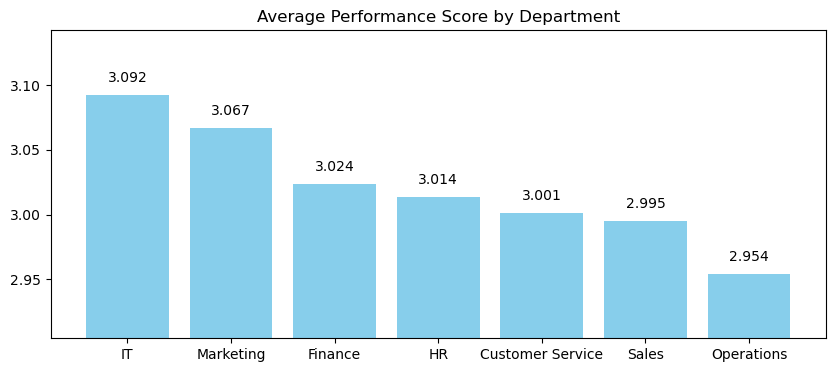

In [55]:

plt.figure(figsize=(10,4))
plt.bar(avg_perf_dep_sal['DepartmentName'], avg_perf_dep_sal['PerformanceScore'], color='skyblue')

for i, v in enumerate(avg_perf_dep_sal['PerformanceScore']): plt.text(i, v + 0.01, f"{v:.3f}", ha='center')


plt.ylim(avg_perf_dep_sal['PerformanceScore'].min() - 0.05, avg_perf_dep_sal['PerformanceScore'].max() + 0.05)
plt.title("Average Performance Score by Department")
plt.show()


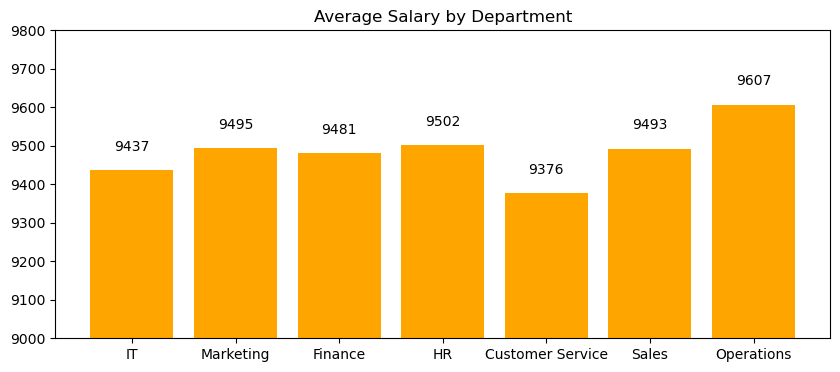

In [56]:
plt.figure(figsize=(10,4))
plt.bar(avg_perf_dep_sal['DepartmentName'], avg_perf_dep_sal['Salary'], color='orange')
for i, v in enumerate(avg_perf_dep_sal['Salary']): plt.text(i, v + 50, f"{v:.0f}", ha='center')

plt.ylim(9000,9800)
plt.title("Average Salary by Department")
plt.show()

The IT department shows the highest average performance score (≈ 3.09), slightly above other departments, while Operations has the lowest (≈ 2.95) despite having one of the highest average salaries (≈ 9607).<br>
This suggests that higher pay in Operations does not necessarily translate into better performance.<br>
Most departments have very close average salaries (≈ 9400–9500), indicating a relatively balanced pay structure across departments.

2.	Which city has the highest average salary and bonus ratio?

In [57]:
city_stats = merged_df.groupby('CityName')[['Salary','BonusRatio']].mean().reset_index()

In [58]:
top_salary_city = city_stats.sort_values(by='Salary', ascending=False).head(1)
top_salary_city

,CityName,Salary,BonusRatio
0,Alexandria,9571.628676,11.630577


Alxandria has the highest salary avg.

In [59]:
top_bonus_ratio_city = city_stats.sort_values(by='BonusRatio', ascending=False).head(1)
top_bonus_ratio_city

,CityName,Salary,BonusRatio
5,Sohag,9507.596545,12.048483


Sohag has the highest bonus avg

3.	Are there gender differences in performance or bonus?

In [60]:
gender_stats = merged_df.groupby('Gender')[['PerformanceScore', 'Bonus']].mean().reset_index()

In [61]:
gender_stats

,Gender,PerformanceScore,Bonus
0,Female,3.024775,988.735923
1,Male,3.020559,1003.855263


(980.0, 1010.0)

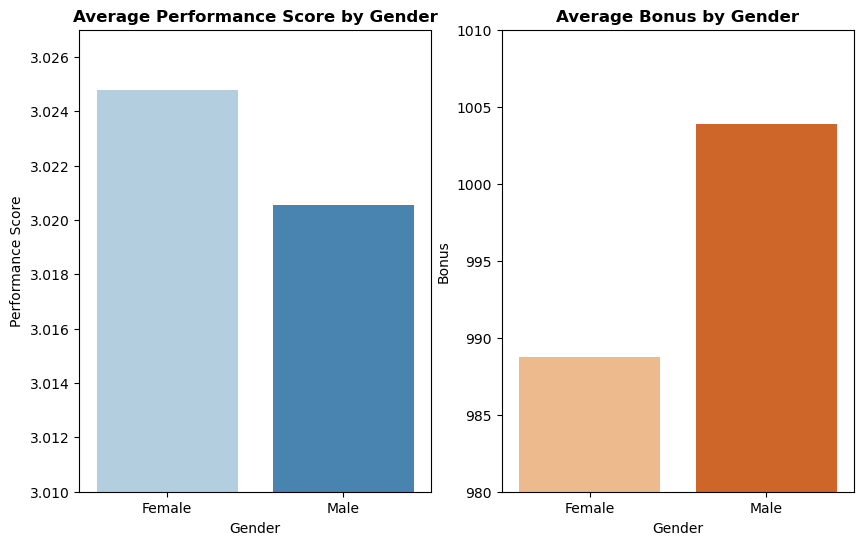

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x='Gender', y='PerformanceScore', data=gender_stats, ax=axes[0], hue='Gender', palette='Blues', legend=False)

axes[0].set_title('Average Performance Score by Gender', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Performance Score')
axes[0].set_xlabel('Gender')
axes[0].set_ylim(3.010, 3.027)

sns.barplot(x='Gender',y='Bonus',data=gender_stats, ax=axes[1], hue='Gender', palette='Oranges', legend=False)

axes[1].set_title('Average Bonus by Gender', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Bonus')
axes[1].set_xlabel('Gender')
axes[1].set_ylim(980, 1010)

Females have a slightly higher average performance score.

However, males receive a noticeably higher average bonus.

This suggests that the bonus system may not be rewarding performance equitably, or that other factors are influencing bonus amounts to the disadvantage of females.

4.	How does years of service affect performance and salary?

In [63]:
years_group = merged_df.groupby('YearsAtCompany_num')[['PerformanceScore', 'Salary']].mean().reset_index()

In [64]:
years_group

,YearsAtCompany_num,PerformanceScore,Salary
0,0.1,2.885417,9413.145833
1,0.2,3.069444,9761.416667
2,0.3,3.250000,9222.666667
3,0.4,2.700000,10300.883333
4,0.5,2.930556,9734.694444
...,...,...,...
96,9.7,3.000000,9384.166667
97,9.8,2.883333,9928.216667
98,9.9,3.187500,9098.145833
99,10.0,3.111111,9330.097222


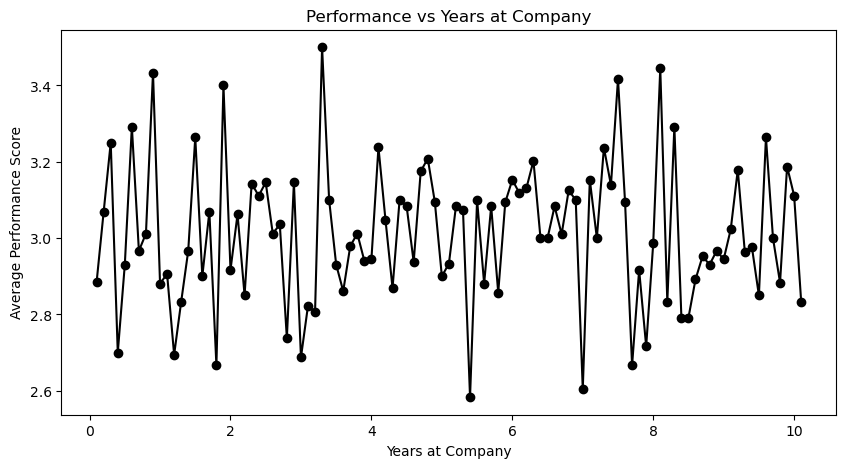

In [65]:
plt.figure(figsize=(10,5))
plt.plot(years_group['YearsAtCompany_num'], years_group['PerformanceScore'], marker='o', color= 'black')
plt.title("Performance vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.show()

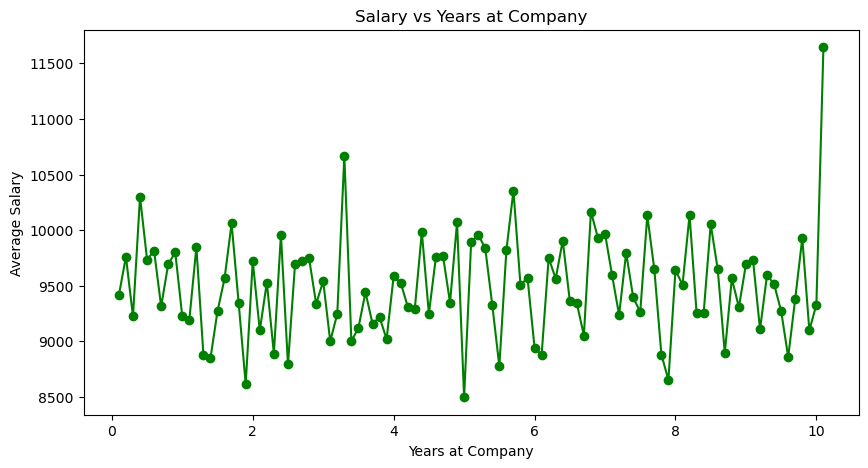

In [66]:
plt.figure(figsize=(10,5))
plt.plot(years_group['YearsAtCompany_num'], years_group['Salary'], marker='o', color='green')
plt.title("Salary vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Salary")
plt.show()


Employees’ performance remains relatively stable across years of service,
with a slight peak around the 3-year mark.<br>
Salaries, however, show irregular increases, likely reflecting promotions or tenure-based raises.

5.	Which job title has the highest bonus ratio or best performance?

In [67]:
job_group = merged_df.groupby('JobTitle')[['PerformanceScore', 'BonusRatio']].mean().reset_index()


In [68]:
job_group

,JobTitle,PerformanceScore,BonusRatio
0,Accountant,2.976852,11.970850
1,Customer Support,3.014768,11.455445
2,Data Analyst,3.061404,11.382311
3,HR Specialist,2.973291,11.732341
4,Marketing Coordinator,3.021062,12.601593
5,Operations Officer,3.062169,11.494853
6,Sales Executive,3.000000,11.915437
7,Software Developer,3.079812,11.508830


In [69]:
job_group_perf = job_group.sort_values(by='PerformanceScore', ascending=False).head(1)
job_group_bonus = job_group.sort_values(by='BonusRatio', ascending=False).head(1)

In [70]:
job_group_perf

,JobTitle,PerformanceScore,BonusRatio
7,Software Developer,3.079812,11.50883


Software Developer has the best performance

In [71]:
job_group_bonus

,JobTitle,PerformanceScore,BonusRatio
4,Marketing Coordinator,3.021062,12.601593


Marketing Coordinator has the best bonus avg 

6.	How does salary range relate to performance score?

In [72]:
salary_bandgroup = merged_df.groupby('SalaryBand')['PerformanceScore'].mean().reindex()


In [73]:
salary_bandgroup

SalaryBand
High    3.034140
Low     3.014768
Mid     3.008689
Name: PerformanceScore, dtype: float64

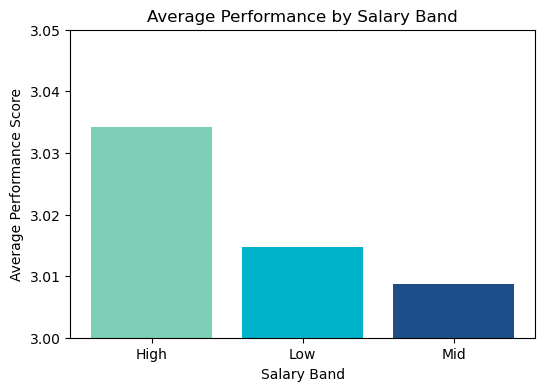

In [74]:
plt.figure(figsize=(6,4))
plt.bar(salary_bandgroup.index, salary_bandgroup.values, color=['#7dcfb6', '#00b2ca', '#1d4e89'])
plt.title("Average Performance by Salary Band")
plt.ylim(3.0,3.05)
plt.xlabel("Salary Band")
plt.ylabel("Average Performance Score")
plt.show()


There is no significant difference in performance across salary bands.<br>
Employees in higher salary ranges show only a marginally higher performance score,
suggesting that salary alone may not be a strong driver of performance in this dataset.

7.	Which age group performs best on average?

In [75]:
age_perf = merged_df.groupby('Age group')['PerformanceScore'].mean().reindex()

In [76]:
age_perf

Age group
Mid       3.012044
Senior    3.032143
Young     3.027985
Name: PerformanceScore, dtype: float64

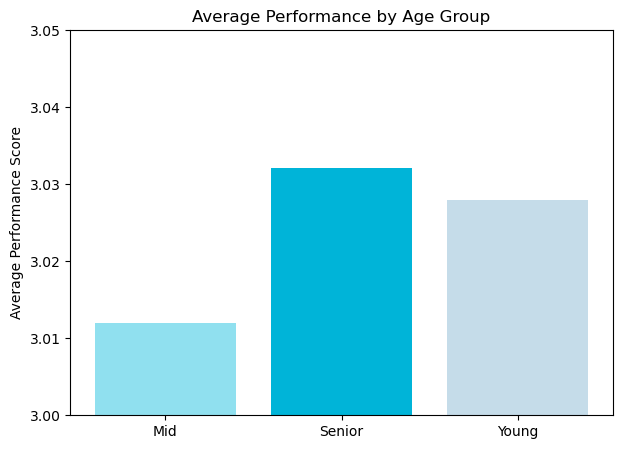

In [77]:
plt.figure(figsize=(7,5))
plt.bar(age_perf.index, age_perf.values, color=["#90e0ef", '#00b4d8', "#c5dce9"])
plt.title("Average Performance by Age Group")
plt.ylabel("Average Performance Score")
plt.ylim(3.00,3.05)
plt.show()

Performance levels are consistent across all age groups,
with slightly higher scores among senior employees,
suggesting that experience may contribute marginally to better performance.

8.	Are employees with longer tenure more likely to get higher bonuses or performance?

In [78]:
ybp = merged_df.groupby('YearsAtCompany_num')[['Bonus','PerformanceScore']].mean().reset_index()

In [79]:
ybp

,YearsAtCompany_num,Bonus,PerformanceScore
0,0.1,1049.322917,2.885417
1,0.2,968.368056,3.069444
2,0.3,843.333333,3.250000
3,0.4,849.800000,2.700000
4,0.5,1006.833333,2.930556
...,...,...,...
96,9.7,938.583333,3.000000
97,9.8,891.250000,2.883333
98,9.9,1053.437500,3.187500
99,10.0,1085.333333,3.111111


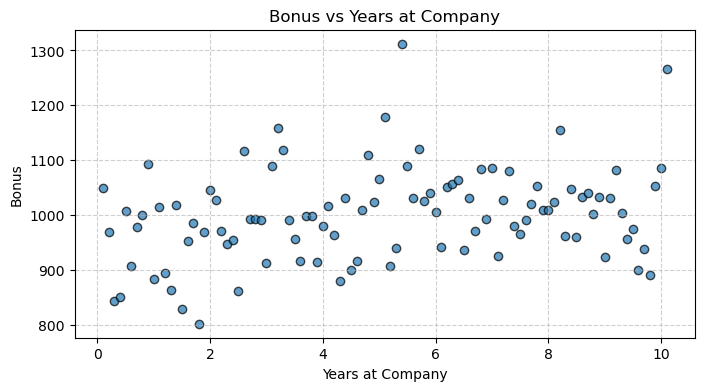

In [80]:
plt.figure(figsize=(8,4))
plt.scatter(ybp['YearsAtCompany_num'], ybp['Bonus'], alpha=0.7,edgecolors='black')
plt.title('Bonus vs Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Bonus')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


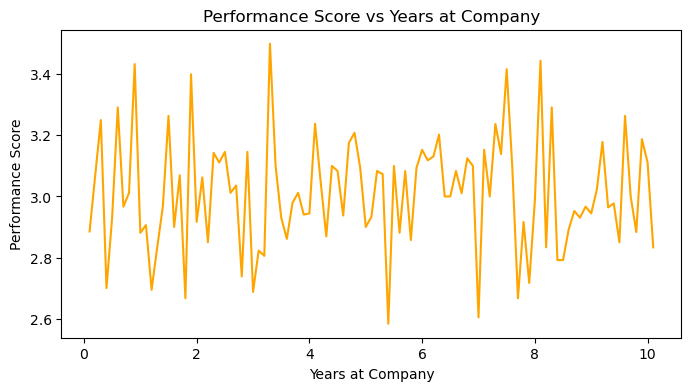

In [81]:
plt.figure(figsize=(8,4))
plt.plot(ybp['YearsAtCompany_num'], ybp['PerformanceScore'], color='orange')
plt.title('Performance Score vs Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Performance Score')
plt.show()


There is no strong correlation between tenure and both performance or bonuses.<br>
Employees with longer service years do not necessarily achieve higher performance scores or receive higher bonuses, suggesting that the reward system may be more performance-based than tenure-based.

what is the avg Deduction by performance level ?

In [82]:
perf_ded = merged_df.groupby('Performance rate')['Deduction'].mean().reset_index()

In [83]:
perf_ded

,Performance rate,Deduction
0,High,750.544749
1,Low,758.990071


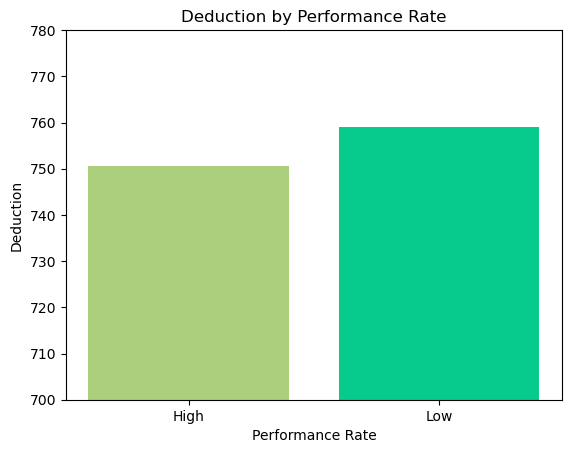

In [84]:
plt.Figure(figsize=(8,5))
plt.bar(perf_ded['Performance rate'], perf_ded['Deduction'], color=["#accf7d", "#00ca8af8"])
plt.title("Deduction by Performance Rate")
plt.xlabel("Performance Rate")
plt.ylabel("Deduction")
plt.ylim(700,780)
plt.show()

Employees with higher performance ratings tend to have slightly lower average deductions, indicating that stronger performers are more consistent and disciplined in attendance or behavior-related metrics.

How are employee status categories (Active, On Leave, Resigned) distributed across departments?

In [85]:
result = merged_df.groupby(['DepartmentName', 'Status']).size().reset_index(name='Count')

In [86]:
result

,DepartmentName,Status,Count
0,Customer Service,Active,384
1,Customer Service,On Leave,360
2,Customer Service,Resigned,384
3,Finance,Active,444
4,Finance,On Leave,372
5,Finance,Resigned,312
6,HR,Active,288
7,HR,On Leave,408
8,HR,Resigned,264
9,IT,Active,396


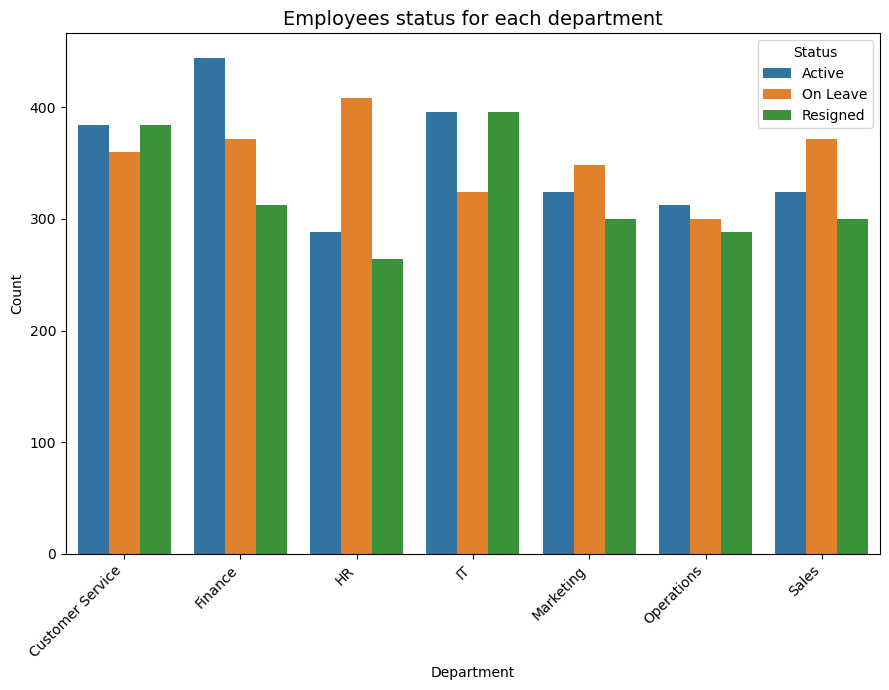

In [87]:
plt.figure(figsize=(9, 7))
    
sns.barplot(data=result,x='DepartmentName',y='Count',hue='Status')
plt.title('Employees status for each department', fontsize=14)
plt.xlabel('Department', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

HR: Highest "On Leave" count and lowest "Active" staff → potential staffing issue.

IT: Highest "Resigned" count → retention problem.

Finance: Most "Active" employees → largest active workforce.

Customer Service: Second-highest resignations → possible attrition concern.

Operations: Balanced distribution across all statuses.

How do attendance rate and overtime hours affect employee performance across departments?

In [88]:
per_ded_att_oh = merged_df.groupby('Performance rate')[['Deduction', 'AttendanceRate', 'OvertimeHours']].mean().reset_index()
per_ded_att_oh

,Performance rate,Deduction,AttendanceRate,OvertimeHours
0,High,750.544749,85.122402,19.480365
1,Low,758.990071,84.922805,18.970567


(84.0, 85.2)

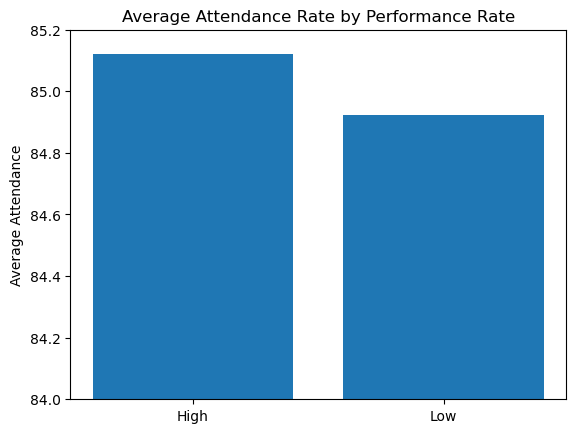

In [89]:
plt.Figure(figsize=(8,5))

plt.bar(per_ded_att_oh['Performance rate'], per_ded_att_oh['AttendanceRate'])
plt.title("Average Attendance Rate by Performance Rate")
plt.ylabel("Average Attendance")
plt.ylim(84.0,85.2)


(15.0, 20.0)

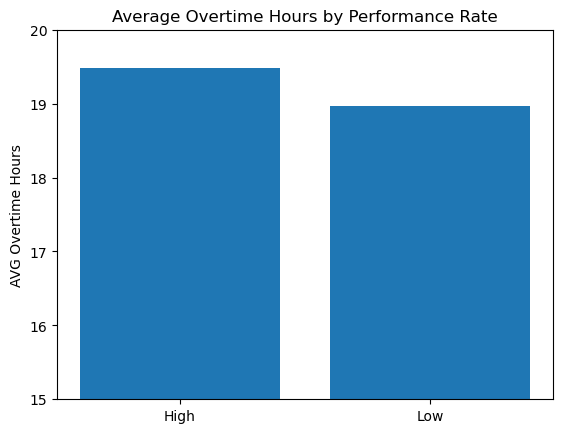

In [90]:
plt.Figure(figsize=(8,5))
plt.bar(per_ded_att_oh['Performance rate'], per_ded_att_oh['OvertimeHours'])
plt.title("Average Overtime Hours by Performance Rate")
plt.ylabel("AVG Overtime Hours")
plt.ylim(15,20)

Employees with higher performance ratings tend to have lower deductions, higher attendance rates, and slightly more overtime hours.<br>
This suggests that consistent attendance and willingness to work extra hours are linked with better performance outcomes.

*Draw Conclusion (Summarize Findings)**

🧠 Key Insights

1️⃣ Department Analysis

IT department has the highest performance score (~3.09).

Operations offers the highest salaries (~9,607) but lowest performance (~2.95).

Salaries across departments are relatively balanced (~9,400–9,500).

Higher pay doesn’t necessarily lead to better performance.

2️⃣ City-Level Insights

Alexandria has the highest average salary.

Sohag records the highest bonus average.

3️⃣ Gender Insights

Females slightly outperform males in performance.

Males receive higher bonuses, suggesting possible bias or other influencing factors.

4️⃣ Tenure & Experience

Performance remains mostly stable across years of service, peaking slightly around 3 years.

Salaries show irregular increases, likely due to promotions or tenure raises.

No strong correlation between tenure and performance/bonus — rewards seem performance-based rather than experience-based.

5️⃣ Job Title Insights

Software Developers achieve the best performance scores.

Marketing Coordinators have the highest average bonuses.

6️⃣ Salary Band & Age Group

Performance remains consistent across salary bands, with only slight improvement at higher ranges.

Senior employees show marginally higher performance, indicating that experience has a small positive effect.

7️⃣ Deductions & Attendance

Employees with higher performance have fewer deductions and better attendance rates.

High performers also tend to log slightly more overtime, showing greater commitment.

8️⃣ Employee Status by Department

HR: Highest "On Leave" and lowest "Active" count → staffing issue.

IT: Highest "Resigned" → retention problem.

Finance: Most "Active" employees → strongest workforce.

Customer Service: High resignation rate → possible attrition issue.

Operations: Balanced employee distribution across all statuses.

Recommendations

1️⃣ HR & Retention

Investigate IT’s high resignation rate; conduct stay interviews to understand causes.

Address HR’s staffing gap to maintain operational efficiency.

Implement wellness or flexibility programs to reduce attrition.

2️⃣ Pay & Bonus Policy

Review bonus allocation criteria — ensure fair distribution between genders and departments.

Consider performance-linked incentives to better align pay with outcomes.

3️⃣ Training & Development

Offer skill-based training to boost performance in low-performing departments (e.g., Operations).

Support early-career employees (0–3 years) to maintain their peak performance period.

4️⃣ Attendance & Productivity

Reward consistent attendance and overtime contribution to sustain motivation.

Use deduction data to flag potential burnout or disengagement risks.

5️⃣ Strategic HR Insights

Develop department-level KPIs using these findings.

Create HR dashboards to monitor real-time performance and engagement trends.